In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDB dataset
max_features = 10000  # number of words to consider as features
maxlen = 150  # cut off reviews after this number of words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


17464789/17464789 [==============================] - 4s 0us/step


In [2]:
# Limit training samples
x_train_limited = x_train[:100]
y_train_limited = y_train[:100]

# Define model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train_limited, y_train_limited, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
4/4 [==============================] - 22s 6s/step - loss: 0.6918 - acc: 0.5600 - val_loss: 0.6942 - val_acc: 0.5000
Epoch 2/10
4/4 [==============================] - 17s 6s/step - loss: 0.6804 - acc: 0.5800 - val_loss: 0.6944 - val_acc: 0.5000
Epoch 3/10
4/4 [==============================] - 17s 6s/step - loss: 0.6696 - acc: 0.5800 - val_loss: 0.6950 - val_acc: 0.5000
Epoch 4/10
4/4 [==============================] - 17s 6s/step - loss: 0.6587 - acc: 0.5800 - val_loss: 0.7005 - val_acc: 0.5000
Epoch 5/10
4/4 [==============================] - 16s 5s/step - loss: 0.6391 - acc: 0.5800 - val_loss: 0.7130 - val_acc: 0.5000
Epoch 6/10
4/4 [==============================] - 16s 5s/step - loss: 0.6172 - acc: 0.5800 - val_loss: 0.7190 - val_acc: 0.5000
Epoch 7/10
4/4 [==============================] - 20s 7s/step - loss: 0.5904 - acc: 0.5800 - val_loss: 0.6989 - val_acc: 0.5041
Epoch 8/10
4/4 [==============================] - 22s 7s/step - loss: 0.5558 - acc: 0.7900 - val_loss: 0

In [4]:
# Define the dimensionality of the GloVe word embeddings
embedding_dim = 100

# Load GloVe word embeddings
glove_dir = 'glove.6B.100d.txt'  
embeddings_index = {}

with open(glove_dir, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Prepare the embedding matrix
embedding_matrix = np.zeros((max_features, embedding_dim))

for word, i in imdb.get_word_index().items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


1641221/1641221 [==============================] - 1s 1us/step


In [5]:
# Define model with GloVe embeddings
model_glove = Sequential()
model_glove.add(Embedding(max_features, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model_glove.add(LSTM(32))
model_glove.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model_glove.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_glove = model_glove.fit(x_train_limited, y_train_limited, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
4/4 [==============================] - 17s 5s/step - loss: 0.6915 - acc: 0.5200 - val_loss: 0.7039 - val_acc: 0.5009
Epoch 2/10
4/4 [==============================] - 14s 5s/step - loss: 0.6666 - acc: 0.5900 - val_loss: 0.6947 - val_acc: 0.5066
Epoch 3/10
4/4 [==============================] - 15s 5s/step - loss: 0.6587 - acc: 0.6100 - val_loss: 0.6962 - val_acc: 0.5071
Epoch 4/10
4/4 [==============================] - 14s 5s/step - loss: 0.6487 - acc: 0.6500 - val_loss: 0.6955 - val_acc: 0.5073
Epoch 5/10
4/4 [==============================] - 16s 5s/step - loss: 0.6463 - acc: 0.6900 - val_loss: 0.7177 - val_acc: 0.5006
Epoch 6/10
4/4 [==============================] - 17s 5s/step - loss: 0.6342 - acc: 0.6000 - val_loss: 0.7285 - val_acc: 0.5002
Epoch 7/10
4/4 [==============================] - 17s 6s/step - loss: 0.6252 - acc: 0.5900 - val_loss: 0.7021 - val_acc: 0.5102
Epoch 8/10
4/4 [==============================] - 17s 6s/step - loss: 0.6134 - acc: 0.7200 - val_loss: 0

782/782 [==============================] - 17s 22ms/step - loss: 0.6972 - acc: 0.5148
Custom Embedding Model - Loss: 0.7051, Accuracy: 0.5452
GloVe Embedding Model - Loss: 0.6972, Accuracy: 0.5148


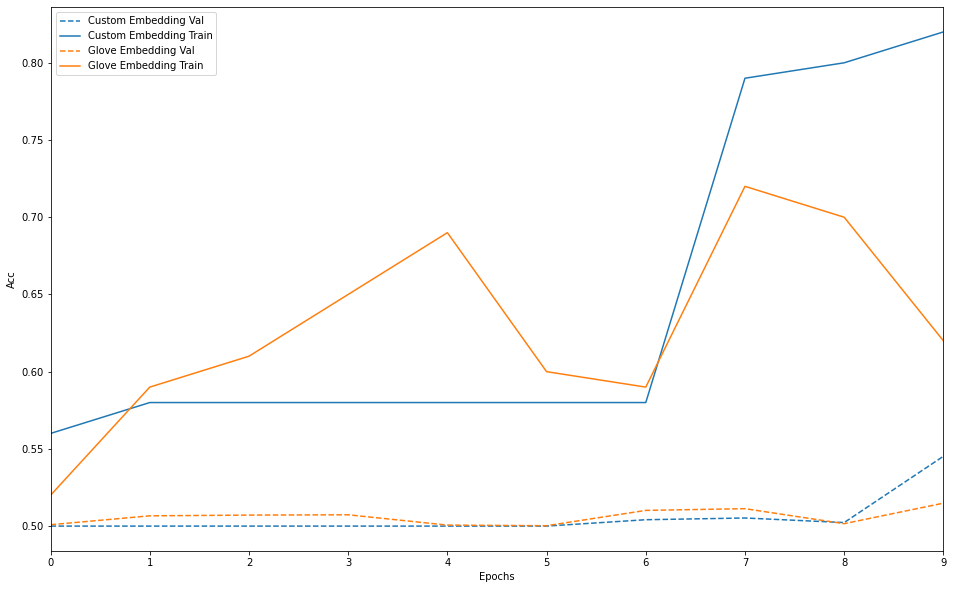

In [6]:
# Evaluate both models on the validation set
eval_custom_embedding = model.evaluate(x_test, y_test)
eval_glove_embedding = model_glove.evaluate(x_test, y_test)

# Print evaluation results
print("Custom Embedding Model - Loss: {:.4f}, Accuracy: {:.4f}".format(eval_custom_embedding[0], eval_custom_embedding[1]))
print("GloVe Embedding Model - Loss: {:.4f}, Accuracy: {:.4f}".format(eval_glove_embedding[0], eval_glove_embedding[1]))

# Optionally, plot the training history for a better comparison
import matplotlib.pyplot as plt

def plot_history(histories, key='acc'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

# Plot accuracy
plot_history([('Custom Embedding', history), ('GloVe Embedding', history_glove)])
